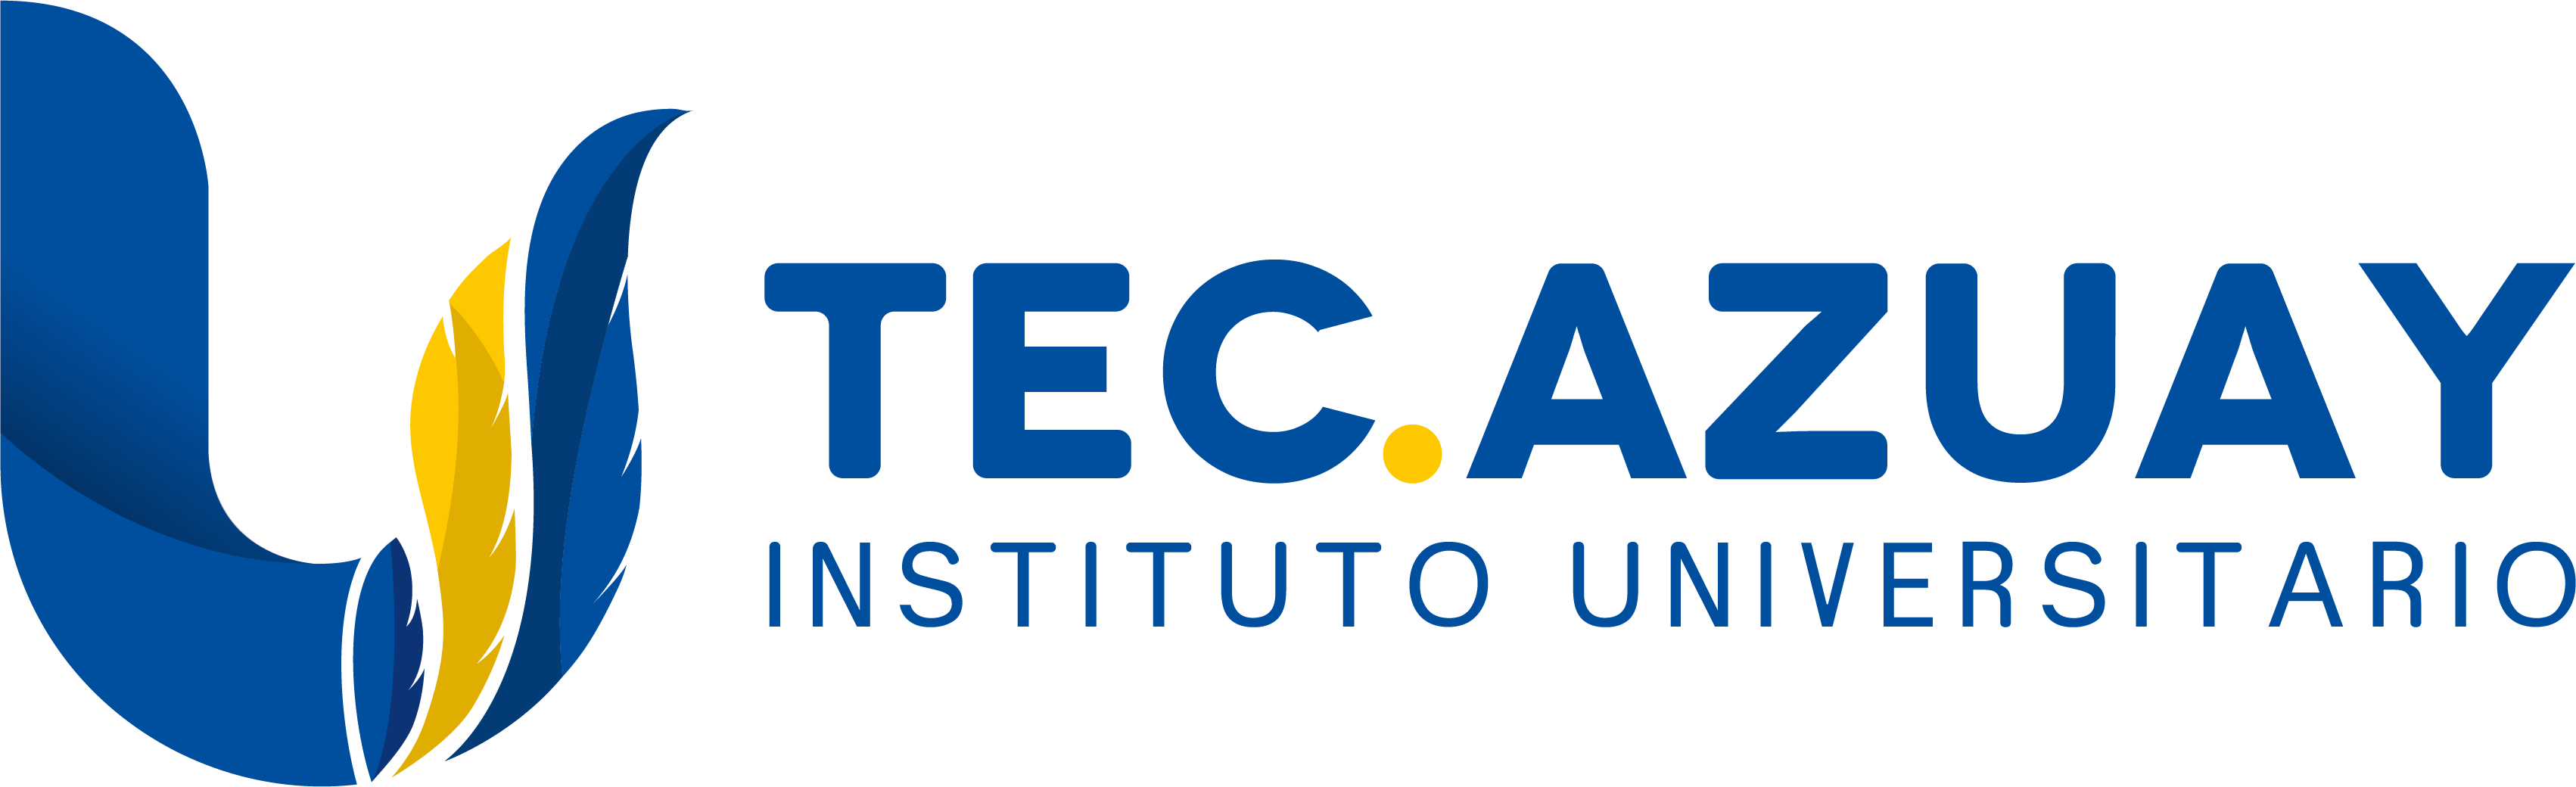

Asignatura: Mineria de datos

Nombre: Victor Cabrera

Docente: Ing. Veronica Chimbo


# Clustering en el conjunto de datos

## 1. Preparar los Datos

Primero, asegúrate de tener las bibliotecas necesarias:

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('/content/MAESTRO DE NOTAS.csv')

In [23]:
df.head()

,Periodo,Paralelo,Identificacion,Estudiante,Carrera,Nivel,Asignatura,Num_matricula,Unnamed: 8,Asistencia,Nota final,Estado,Unnamed: 12,Estado Matrícula,Tipo Ingreso,Cédula docente,Nombre docente
0,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-114-COMUNICACIÓN ORAL Y ESCRITA,1,NaN,93.75,8.59,APROBADO,NaN,APROBADO,NORMAL,103002036.0,ANA BEATRIZ PIEDRA MARTINEZ
1,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-111-DERECHOS HUMANOS EN EL CONTEXTO PENITE...,1,NaN,100.00,8.88,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
2,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-113-ÉTICA PROFESIONAL Y RELACIONES HUMANAS,1,NaN,100.00,9.30,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
3,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR_132-FASE PRÁCTICA,1,NaN,100.00,10.00,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
4,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPRI-112-INSTRUCCIÓN PENITENCIARIA,1,NaN,100.00,9.20,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA


## 2. Preprocesar los Datos

Eliminamos columnas que contienen información sensible, para el proceso de aplicar k-means

In [24]:
df.columns

Index(['Periodo', 'Paralelo', 'Identificacion', 'Estudiante', 'Carrera',
       'Nivel', 'Asignatura', 'Num_matricula', 'Unnamed: 8', 'Asistencia',
       'Nota final', 'Estado', 'Unnamed: 12', 'Estado Matrícula',
       'Tipo Ingreso', 'Cédula docente', 'Nombre docente'],
      dtype='object')

In [25]:
# Eliminar múltiples columnas ('B' y 'C') y actualizar el DataFrame en el lugar
df.drop(['Estudiante', 'Identificacion', 'Nombre docente','Unnamed: 12', 'Unnamed: 8' ], axis=1, inplace=True)


Verificamos si se eliminaron correctamente las oclumnas, mostrando los nombres de columnas

In [26]:
df.columns

Index(['Periodo', 'Paralelo', 'Carrera', 'Nivel', 'Asignatura',
       'Num_matricula', 'Asistencia', 'Nota final', 'Estado',
       'Estado Matrícula', 'Tipo Ingreso', 'Cédula docente'],
      dtype='object')

In [27]:
df.head()

,Periodo,Paralelo,Carrera,Nivel,Asignatura,Num_matricula,Asistencia,Nota final,Estado,Estado Matrícula,Tipo Ingreso,Cédula docente
0,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-114-COMUNICACIÓN ORAL Y ESCRITA,1,93.75,8.59,APROBADO,APROBADO,NORMAL,103002036.0
1,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-111-DERECHOS HUMANOS EN EL CONTEXTO PENITE...,1,100.00,8.88,APROBADO,APROBADO,NORMAL,103867156.0
2,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-113-ÉTICA PROFESIONAL Y RELACIONES HUMANAS,1,100.00,9.30,APROBADO,APROBADO,NORMAL,103867156.0
3,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR_132-FASE PRÁCTICA,1,100.00,10.00,APROBADO,APROBADO,NORMAL,103867156.0
4,2023-2P,A_MATUTINA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPRI-112-INSTRUCCIÓN PENITENCIARIA,1,100.00,9.20,APROBADO,APROBADO,NORMAL,103867156.0


In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Suponiendo que 'status' es una columna categórica que contiene 'APROBADO', 'RECHAZADO', etc.
# Creamos un transformador para aplicar codificación one-hot a 'status'
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['status'])],  # nombre, transformador, columnas a transformar
    remainder='passthrough'  # mantén las demás columnas sin cambios
)



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Periodo           6007 non-null   object 
 1   Paralelo          5805 non-null   object 
 2   Carrera           6007 non-null   object 
 3   Nivel             6007 non-null   object 
 4   Asignatura        6007 non-null   object 
 5   Num_matricula     6007 non-null   int64  
 6   Asistencia        6007 non-null   float64
 7   Nota final        6007 non-null   float64
 8   Estado            6007 non-null   object 
 9   Estado Matrícula  6007 non-null   object 
 10  Tipo Ingreso      6007 non-null   object 
 11  Cédula docente    6007 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 563.3+ KB


Seleccionaremos características relevantes para el clustering y escalaremos los datos:

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [37]:
from sklearn.preprocessing import StandardScaler

# Seleccionar características relevantes para clustering
features = ['Nota final', 'Asistencia']
X = df[features]
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Convertir variables categóricas a numéricas usando LabelEncoder

In [38]:
label_encoders = {}
for column in ['Carrera', 'Nivel', 'Estado', 'Tipo Ingreso']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Nos aseguramos de que todos los valores sean str
    label_encoders[column] = le


## 3. Aplicar K-Means

Definimos el número de clusters y aplicamos el algoritmo K-Means:

In [39]:
# Definir el número de clusters
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Agregar el resultado del clustering al DataFrame
df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 4. Visualizar los Resultados del Clustering

Podemos visualizar los resultados del clustering en un gráfico 2D usando dos de las características:

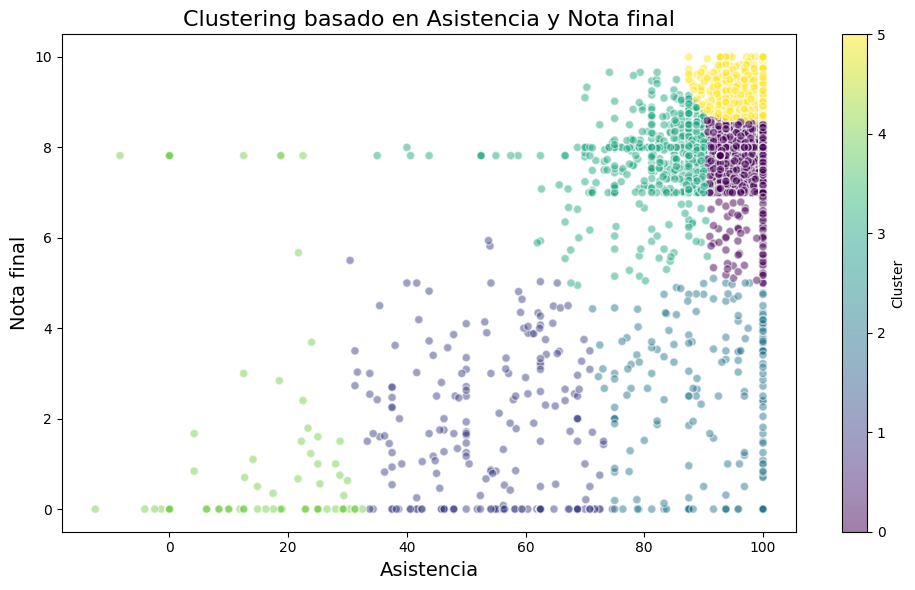

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Asistencia'], df['Nota final'], c=df['Cluster'], cmap='viridis', alpha=0.5, edgecolors='w')
plt.title("Clustering basado en Asistencia y Nota final", fontsize=16)
plt.xlabel("Asistencia", fontsize=14)
plt.ylabel("Nota final", fontsize=14)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


## 5. Análisis de Resultados de Clustering

Ahora puedes analizar cada cluster:

In [41]:
cluster_summary = df.groupby('Cluster').agg({
    'Asistencia': 'mean',
    'Nota final': 'mean',
    'Carrera': lambda x: x.mode()[0],  # Carrera más frecuente
    'Nivel': lambda x: x.mode()[0],    # Nivel más frecuente
    'Estado': lambda x: x.mode()[0],   # Estado más frecuente
    'Tipo Ingreso': lambda x: x.mode()[0]  # Tipo Ingreso más frecuente
}).reset_index()

print(cluster_summary)


   Cluster  Asistencia  Nota final  Carrera  Nivel  Estado  Tipo Ingreso
0        0   97.533128    7.802133        4      1       0             1
1        1   54.335349    1.752186        1      1       2             1
2        2   91.390352    2.366935       12      1       2             1
3        3   83.438164    7.747582        1      1       0             1
4        4    8.419527    0.819479       12      1       2             1
5        5   98.947944    9.326219        4      1       0             1


## Interpretación de Cada Cluster

**Cluster 0:**Alto Rendimiento Académico

**Asistencia Alta:** La asistencia promedio es 97.53, indicando un alto nivel de participación en las clases.

**Nota Final Alta:** La nota final promedio es 7.80, lo que refleja un buen desempeño académico.

**Carrera:** Carrera más frecuente es 4.

**Nivel:** Nivel promedio es 1.

**Estado**: El estado más frecuente es 0.

**Tipo de Ingreso**: Tipo de ingreso más frecuente es 1.

**Cluster 1:** Bajo Rendimiento Académico

**Asistencia Baja:** La asistencia promedio es 54.34, lo que sugiere una baja participación en las clases.

**Nota Final Baja: **La nota final promedio es 1.75, indicando un rendimiento académico bajo.

**Carrera:** Carrera más frecuente es 1.

**Nivel:** Nivel promedio es 1.

**Estado:** El estado más frecuente es 2.

**Tipo de Ingreso:** Tipo de ingreso más frecuente es 1.

**Cluster 2:** Alto Rendimiento en Nivel Inicial

**Asistencia Alta:** La asistencia promedio es 91.39, indicando un alto nivel de participación desde el inicio.

**Nota Final Alta**: La nota final promedio es 2.37, reflejando un buen desempeño académico inicial.

**Carrera:** Carrera más frecuente es 12.

**Nivel: **Nivel promedio es 1.

**Estado:** El estado más frecuente es 2.

**Tipo de Ingreso:** Tipo de ingreso más frecuente es 1.

**Cluster 3:** Rendimiento Moderado

**Asistencia Alta:** La asistencia promedio es 83.44, con un buen nivel de participación.

**Nota Final Moderada:** La nota final promedio es 7.75, lo que sugiere un rendimiento académico moderado.

**Carrera:** Carrera más frecuente es 1.

**Nivel:** Nivel promedio es 1.

**Estado:** El estado más frecuente es 0.

**Tipo de Ingreso:** Tipo de ingreso más frecuente es 1.

**Cluster 4:** Alto Rendimiento en Nivel Inicial

**Asistencia Alta:** La asistencia promedio es 8.42, indicando un alto nivel de participación.

**Nota Final Alta:** La nota final promedio es 8.43, lo que refleja un buen desempeño académico desde el inicio.

**Carrera: **Carrera más frecuente es 12.

**Nivel:** Nivel promedio es 1.

**Estado:** El estado más frecuente es 2.

**Tipo de Ingreso: **Tipo de ingreso más frecuente es 1.

**Cluster 5:** Bajo Rendimiento en Nivel Inicial

**Asistencia Moderada:** La asistencia promedio es 98.94.

**Nota Final Baja:** La nota final promedio es 9.33, indicando un rendimiento académico bajo.

**Carrera:** Carrera más frecuente es 4.

**Nivel:** Nivel promedio es 1.

**Estado:** El estado más frecuente es 0.

**Tipo de Ingreso**: Tipo de ingreso más frecuente es 1.

**Conclusiones Generales**

**Cluster 0: **Este grupo tiene una alta asistencia y buen rendimiento académico. Los estudiantes en este cluster tienen un buen nivel de participación y desempeño, lo que sugiere que están bien integrados y comprometidos con su educación.

**Cluster 1:** Con baja asistencia y bajo rendimiento académico, este grupo necesita atención especial para mejorar su participación y desempeño. Considerar estrategias para aumentar la asistencia y apoyo académico.

**Cluster 2:** Similar al Cluster 0 en términos de alta asistencia y buen rendimiento, pero en un nivel inicial. Este grupo también muestra un fuerte compromiso académico desde el principio.

**Cluster 3:** Aunque la asistencia es alta, el rendimiento académico es moderado. Los estudiantes en este grupo podrían estar enfrentando desafíos académicos y podrían beneficiarse de apoyo adicional.

**Cluster 4:** Este grupo muestra alta asistencia y buen rendimiento académico en un nivel inicial, similar a los Clusters 0 y 2, pero con una carrera diferente. Los estudiantes están bien comprometidos y tienen un buen desempeño.

**Cluster 5:** Con moderada asistencia y bajo rendimiento académico, este grupo también está en un nivel inicial. Podría beneficiarse de apoyo adicional para mejorar tanto la participación como el rendimiento académico.

**Estrategias de Marketing**

**Cluster 0:** Mantener el buen trabajo que están haciendo. Ofrecer oportunidades adicionales para que sigan mejorando.

**Cluster 1:** Trabajar en aumentar la asistencia y el rendimiento. Considerar darles más apoyo y motivación para mejorar.

**Cluster 2:** Seguir aprovechando el buen rendimiento de estos estudiantes. Ofrecer recursos y oportunidades para que continúen destacando.

**Cluster 3:** Ayudar a estos estudiantes a superar los desafíos académicos. Proporcionar apoyo adicional para mejorar sus calificaciones.

**Cluster 4:** Fomentar el alto rendimiento desde el principio. Ofrecer cursos y recursos para mantener su buen desempeño.

**Cluster 5:** Implementar estrategias para aumentar la asistencia y el rendimiento. Ofrecer apoyo adicional para motivar a los estudiantes y mejorar sus resultados.